Please enter the amazon product url : https://www.amazon.com/Reebok-Mens-Workout-Classic-Shoe/dp/B00O22QHTA?pf_rd_p=620603ad-0491-422c-a6dc-22dac9d7dad1&pd_rd_wg=mF9Ll&pf_rd_r=85M0Q861T8HH6W5E2GXG&ref_=pd_gw_srecs_l2ra&pd_rd_w=IItj6&pd_rd_r=4677eede-1f27-47b3-89fa-74b8b0083098
product title
Reebok Men's Workout Low Classic Shoe
product price details
$45.55 - $87.99
url is modified
sugestion product title adn details
product title
Reebok Men's Workout Plus Cross Trainer
product price details
$20.88 - $160.34


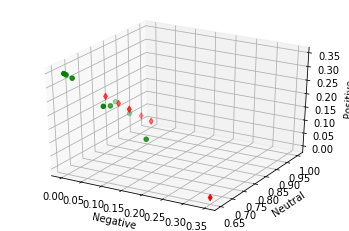

In [2]:
import requests

from bs4 import BeautifulSoup

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

def get_sentiments(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)





def get_reveiws(iteam_url):

    headers = {'User-Agent': 'Mozilla/5.0'}

    page = requests.get(iteam_url, headers=headers)


    soup = BeautifulSoup(page.text, 'html5lib')

    print ("product title")
    span = soup.find('span', {'id': 'productTitle'})

    print (span.get_text().strip())


    price_span = soup.find('span', {'id': 'priceblock_ourprice'})
    print("product price details")
    print (price_span.get_text().strip())


    saving_table = soup.find_all('tr', {'id': 'regularprice_savings'})

    for row in saving_table:
        print (row.get_text().strip())


    reviews_list = soup.find_all('div', {'id': 'cm-cr-dp-review-list'})
    
    


    customer_reviews = []

    cutomer_rating = []

    for review in reviews_list[0]:
        review_span = review.find_all('span')
        cutomer_rating.append(review_span[1].get_text().strip())
        customer_reviews.append(review_span[7].get_text().strip())
    
    return customer_reviews, cutomer_rating, soup
    
    

item_page = input("Please enter the amazon product url : ")

customer_reviews, cutomer_rating, soup = get_reveiws(item_page)

related_items = soup.find('div', {'class': 'a-carousel-viewport'})

sugestions = related_items.find('ol')

first_suggestion = sugestions.findAll('li')[0]

first_suggestion_link = first_suggestion.find('div').find('a', {'class': 'a-link-normal'})['href']

if first_suggestion_link.startswith( 'https://www.amazon.com'):
    print ("url is fine")
else:
    print('url is modified')
    first_suggestion_link = "https://www.amazon.com" + first_suggestion_link
    

    
print ("sugestion product title adn details")
sugestion_reviews, sugestion_rating, sugestion_soup = get_reveiws(first_suggestion_link)
    
fig = plt.figure()

ax = fig.add_subplot(111, projection = '3d')

sentiments = [get_sentiments(rev) for rev in customer_reviews]

sugestion_sentiments = [get_sentiments(srev) for srev in sugestion_reviews]


sxs = [sent['neg'] for sent in sugestion_sentiments]
sys = [sent['neu'] for sent in sugestion_sentiments]
szs = [sent['pos'] for sent in sugestion_sentiments]

xs = [sent['neg'] for sent in sentiments]
ys = [sent['neu'] for sent in sentiments]
zs = [sent['pos'] for sent in sentiments]

ax.scatter(xs, ys,zs,color='r',label='given_item', marker = 'd')
ax.scatter(sxs, sys,szs,color='g',label='first_sugested_item', marker = 'o')

ax.set_xlabel('Negative')
ax.set_ylabel('Neutral')
ax.set_zlabel('Positive')

plt.show()